# Importing Libraries, dataframe and checking outcome

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline
path=r'/Users/stefaniadaskalaki/Google Drive/Data Immersion/6 Achievement/CF6 BRecom'

In [3]:
df_all=pd.read_csv(os.path.join(path, '02. Data', '02. Prepared Data', 'all_cleaned.csv'),index_col=False)

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
df_all.head(4)

,Unnamed: 0,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113368 entries, 0 to 113367
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     113368 non-null  int64  
 1   order_id                       113368 non-null  object 
 2   customer_id                    113368 non-null  object 
 3   order_status                   113368 non-null  object 
 4   order_approved_at              113368 non-null  object 
 5   order_delivered_customer_date  113368 non-null  object 
 6   order_estimated_delivery_date  113368 non-null  object 
 7   payment_sequential             113368 non-null  int64  
 8   payment_type                   113368 non-null  object 
 9   payment_installments           113368 non-null  int64  
 10  payment_value                  113368 non-null  float64
 11  customer_unique_id             113368 non-null  object 
 12  customer_zip_code_prefix      

# Data Cleaning

In [7]:
df_all=df_all.dropna()

In [8]:
# dropping unnamed column

df_all=df_all.drop(columns = ['Unnamed: 0'])

# Products Clustering

## Clustering based on product characteristics

### Wraggling and cleaning selected data

In [9]:
# grouping by product_id and aggregating the mean of all characteristics

df_prod_info = df_all.groupby('product_id', as_index=False).agg({'price':'mean','product_length_cm':'mean','product_height_cm':'mean','product_weight_g':'mean','product_width_cm':'mean', })

In [10]:
df_prod_info

,product_id,price,product_length_cm,product_height_cm,product_weight_g,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,20.0,16.0,300.0,16.0
1,00088930e925c41fd95ebfe695fd2655,129.90,55.0,10.0,1225.0,26.0
2,0009406fd7479715e4bef61dd91f2462,229.00,45.0,15.0,300.0,35.0
3,000b8f95fcb9e0096488278317764d19,58.90,19.0,24.0,550.0,12.0
4,000d9be29b5207b54e86aa1b1ac54872,199.00,22.0,11.0,250.0,15.0
...,...,...,...,...,...,...
31610,fff6177642830a9a94a0f2cba5e476d1,114.99,42.0,25.0,1400.0,15.0
31611,fff81cc3158d2725c0655ab9ba0f712c,90.00,16.0,16.0,58.0,11.0
31612,fff9553ac224cec9d15d49f5a263411f,32.00,16.0,13.0,150.0,11.0
31613,fffdb2d0ec8d6a61f0a0a0db3f25b441,33.99,16.0,4.0,150.0,13.0


In [11]:
# dropping product_id 

df_prod_info=df_prod_info.drop(columns = ['product_id'])

In [12]:
df_prod_info

,price,product_length_cm,product_height_cm,product_weight_g,product_width_cm
0,101.65,20.0,16.0,300.0,16.0
1,129.90,55.0,10.0,1225.0,26.0
2,229.00,45.0,15.0,300.0,35.0
3,58.90,19.0,24.0,550.0,12.0
4,199.00,22.0,11.0,250.0,15.0
...,...,...,...,...,...
31610,114.99,42.0,25.0,1400.0,15.0
31611,90.00,16.0,16.0,58.0,11.0
31612,32.00,16.0,13.0,150.0,11.0
31613,33.99,16.0,4.0,150.0,13.0


In [13]:
df_prod_cl= df_prod_info

In [14]:
df_prod_cl.head(5)

,price,product_length_cm,product_height_cm,product_weight_g,product_width_cm
0,101.65,20.0,16.0,300.0,16.0
1,129.90,55.0,10.0,1225.0,26.0
2,229.00,45.0,15.0,300.0,35.0
3,58.90,19.0,24.0,550.0,12.0
4,199.00,22.0,11.0,250.0,15.0


In [15]:
df_prod_cl.shape

(31615, 5)

### Using the Elbow method to determine the number of clusters

In [16]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [17]:
# Creating a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_prod_cl).score(df_prod_cl) for i in range(len(kmeans))] 
score

[-576314799188.456,
 -164461093690.8542,
 -73258335312.78769,
 -44004774238.16371,
 -29004712710.42263,
 -19712298952.776527,
 -14834954435.383171,
 -11464615002.525784,
 -9457242601.209362]

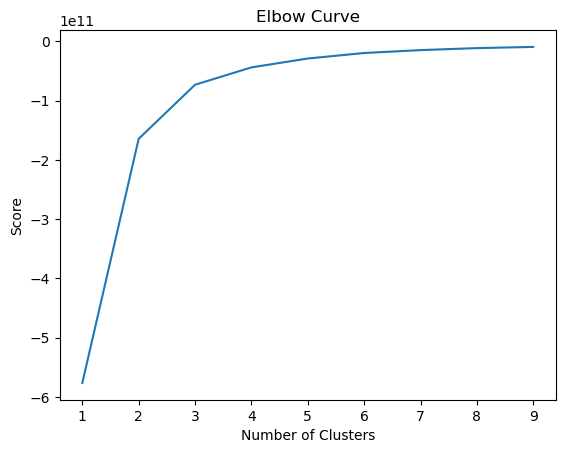

In [18]:
# Plotting the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

It is clear that the cusrve starts to flatten out after number 4 in the axis. In this case the optimal count for the clusters is 4.

### K-means clustering

In [19]:
# creating the object based on the n° of clusters

kmeans = KMeans(n_clusters = 4) 

In [20]:
kmeans.fit(df_prod_cl)

KMeans(n_clusters=4)

In [21]:
df_prod_cl['clusters'] = kmeans.fit_predict(df_prod_cl)

In [22]:
df_prod_cl.tail()

,price,product_length_cm,product_height_cm,product_weight_g,product_width_cm,clusters
31610,114.99,42.0,25.0,1400.0,15.0,0
31611,90.00,16.0,16.0,58.0,11.0,0
31612,32.00,16.0,13.0,150.0,11.0,0
31613,33.99,16.0,4.0,150.0,13.0,0
31614,249.99,43.0,16.0,3900.0,11.0,3


In [23]:
df_prod_cl['clusters'].value_counts()

0    26322
3     3269
1     1471
2      553
Name: clusters, dtype: int64

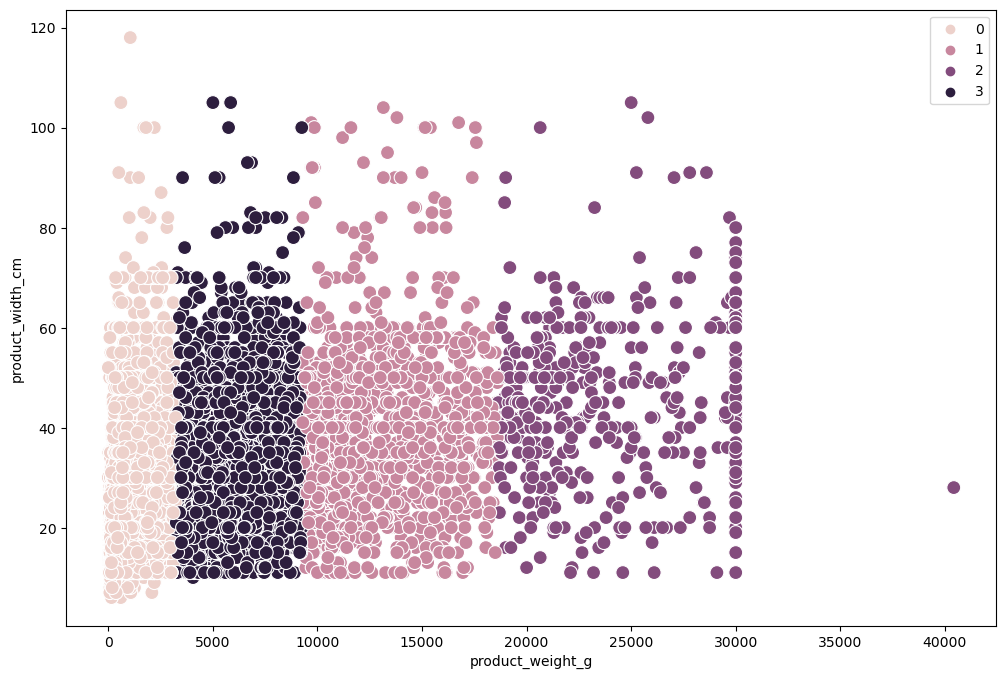

In [25]:
# plotting the clusters for the "Product weight in gr" and "Product width in cm" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prod_cl['product_weight_g'], y=df_prod_cl['product_width_cm'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('product_weight_g') # Label x-axis.
plt.ylabel('product_width_cm') # Label y-axis.
plt.show()

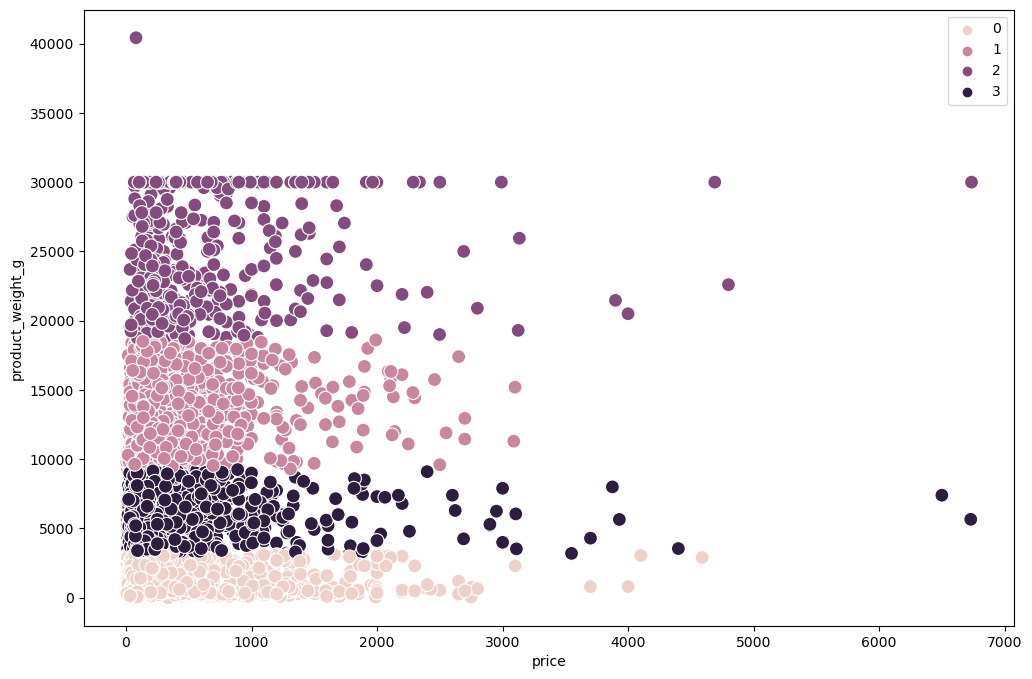

In [26]:
# plotting the clusters for the "Price" and "Product weight in gr" variables


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prod_cl['price'], y=df_prod_cl['product_weight_g'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price') # Label x-axis.
plt.ylabel('product_weight_g') # Label y-axis.
plt.show()

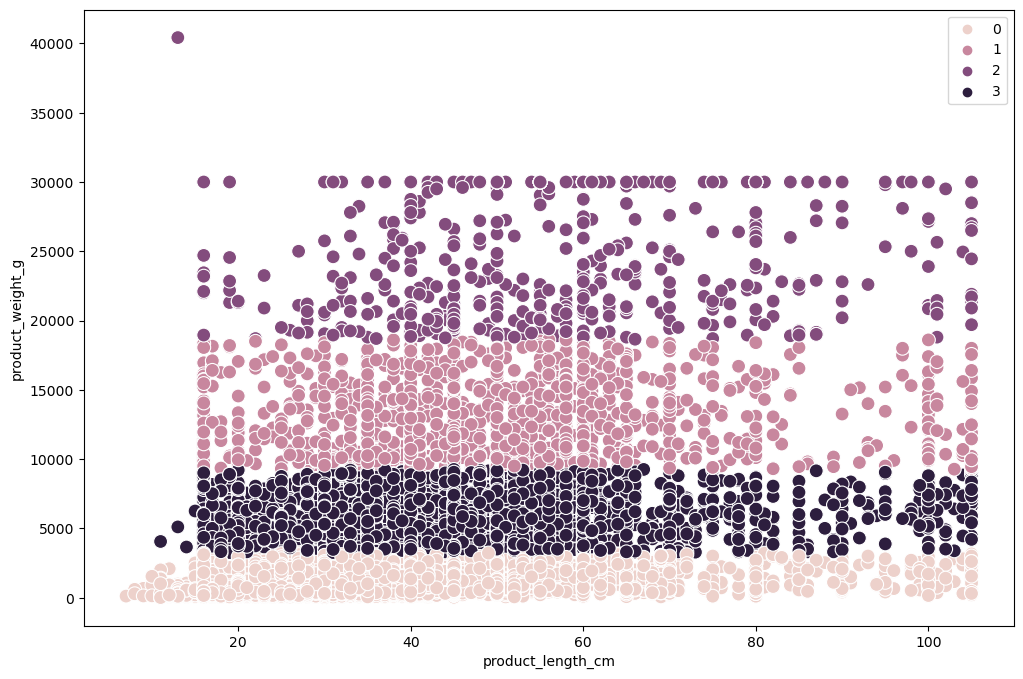

In [27]:
# plotting the clusters for the "Product length in cm" and "Product weight in gr" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prod_cl['product_length_cm'], y=df_prod_cl['product_weight_g'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('product_length_cm') # Label x-axis.
plt.ylabel('product_weight_g') # Label y-axis.
plt.show()

# State Clustering

## Clustering based on state variables

### Wraggling and cleaning selected data

In [28]:
df_state_info = df_all.groupby('customer_state', as_index=False).agg({"order_id":pd.Series.nunique,'price':'mean','freight_value':'mean', })

In [29]:
df_state_info=df_state_info.drop(columns = ['customer_state'])

In [30]:
df_state= df_state_info

### Using the Elbow method to determine the number of clusters

In [31]:
state_cl = range(1, 10) 
kmeans2 = [KMeans(n_clusters=i) for i in state_cl] 

In [32]:
# Creating a score that represents a rate of variation for the given cluster option

score = [kmeans2[i].fit(df_state).score(df_state) for i in range(len(kmeans2))] 
score

[-1626949068.725301,
 -249484214.50768048,
 -51703671.05520876,
 -11869673.261315253,
 -5115428.31931762,
 -2203181.2734016255,
 -1258504.54610025,
 -776332.4792905096,
 -511315.9775614321]

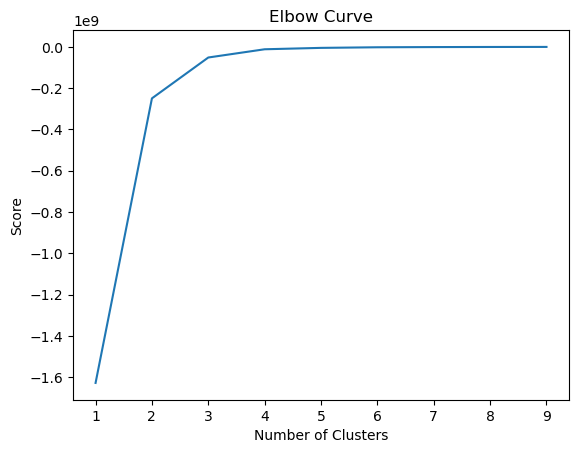

In [33]:
# Plotting the elbow curve using PyLab

pl.plot(state_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

It is clear that the cusrve starts to flatten out after number 3 in the axis. In this case the optimal count for the clusters is 3.

### K-means clustering

In [34]:
# creating the object based on the n° of clusters

kmeans2 = KMeans(n_clusters = 3) 
kmeans2.fit(df_state)
df_state['clusters'] = kmeans2.fit_predict(df_state)

In [35]:
df_state['clusters'].value_counts()

0    24
2     2
1     1
Name: clusters, dtype: int64

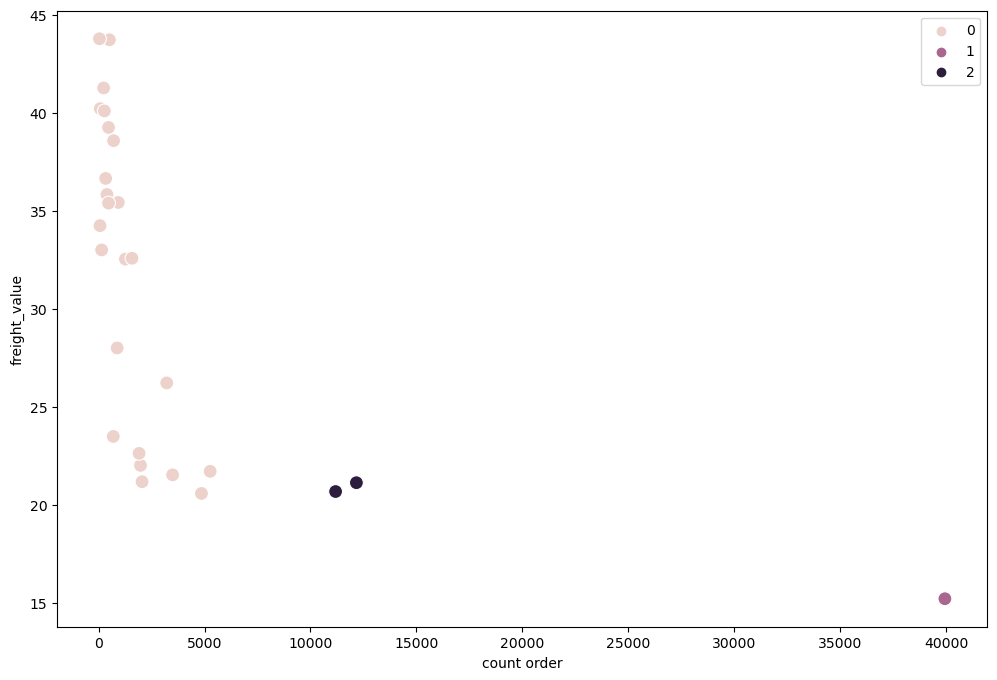

In [36]:
# plotting the clusters for the "Order id" and "Freight value" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_state['order_id'], y=df_state['freight_value'], hue=kmeans2.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('count order') # Label x-axis.
plt.ylabel('freight_value') # Label y-axis.
plt.show()

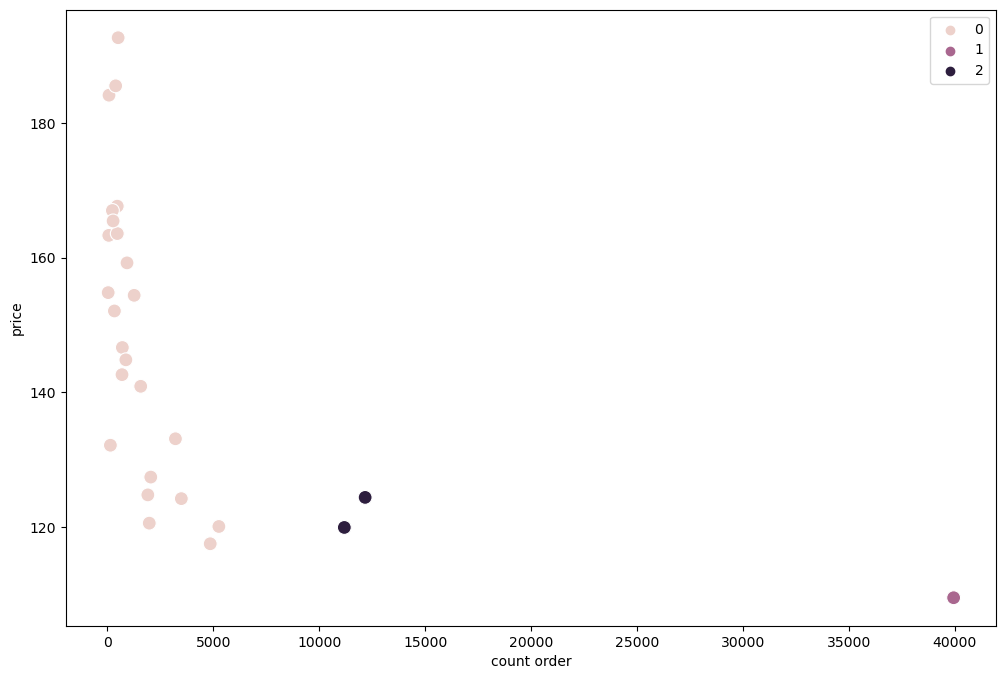

In [37]:
# plotting the clusters for the "Order id" and "Price" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_state['order_id'], y=df_state['price'], hue=kmeans2.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('count order') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

In [39]:
# exporting datasets

